## DIA 011: Introduccion a las Redes Neuronales Convolucionales (CNN)

Las CNN son una arquitectura de redes neuronales especialmente eficaz para tareas de procesamiento de imágenes, como la clasificación de objetos, detección de bordes y reconocimiento de patrones.

In [2]:
# 1. Importación de Librerías
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 2. Cargar el dataset MNIST
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizar los valores de píxeles de 0-255 a 0-1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape para agregar el canal de color (1 para escala de grises)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Verificar la forma de los datos
print("Forma de X_train:", X_train.shape)  # (60000, 28, 28, 1)
print("Forma de y_train:", y_train.shape)  # (60000,)
print("Forma de X_test:", X_test.shape)    # (10000, 28, 28, 1)
print("Forma de y_test:", y_test.shape)    # (10000,)


Forma de X_train: (60000, 28, 28, 1)
Forma de y_train: (60000,)
Forma de X_test: (10000, 28, 28, 1)
Forma de y_test: (10000,)


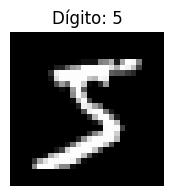

In [4]:
# 3. Visualizacion de Datos
# Función para visualizar imágenes
def mostrar_imagenes(matriz, etiquetas, indice):
    plt.figure(figsize=(2,2))
    plt.imshow(matriz[indice].reshape(28, 28), cmap='gray')
    plt.title(f"Dígito: {etiquetas[indice]}")
    plt.axis('off')
    plt.show()

# Mostrar la primera imagen del conjunto de entrenamiento
mostrar_imagenes(X_train, y_train, 0)


In [5]:
# 4. Construcción del Modelo CNN
# Crear el modelo usando la API Sequential de Keras
model = models.Sequential([
    # Primera capa convolucional
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Segunda capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Tercera capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Capa de flattening
    layers.Flatten(),
    
    # Capa densa
    layers.Dense(64, activation='relu'),
    
    # Capa de salida
    layers.Dense(10, activation='softmax')
])

# Resumen del modelo
model.summary()


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# 5. Compilación del Modelo
# Compilar el modelo definiendo el optimizador, la función de pérdida y las métricas
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# 6. Entrenamiento del Modelo
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8972 - loss: 0.3360 - val_accuracy: 0.9857 - val_loss: 0.0442
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9846 - loss: 0.0479 - val_accuracy: 0.9872 - val_loss: 0.0379
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9897 - loss: 0.0344 - val_accuracy: 0.9894 - val_loss: 0.0341
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9927 - loss: 0.0237 - val_accuracy: 0.9888 - val_loss: 0.0345
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9939 - loss: 0.0184 - val_accuracy: 0.9898 - val_loss: 0.0342
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9955 - loss: 0.0134 - val_accuracy: 0.9882 - val_loss: 0.0445
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9963 - loss: 0.0119 - val_accuracy: 0.9911 - val_loss: 0.0298
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9967 - loss: 0.0094 - 

In [8]:
# 7. Evaluación del Modelo
# Evaluar el rendimiento en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')


313/313 - 1s - 2ms/step - accuracy: 0.9917 - loss: 0.0326

Precisión en el conjunto de prueba: 0.9917


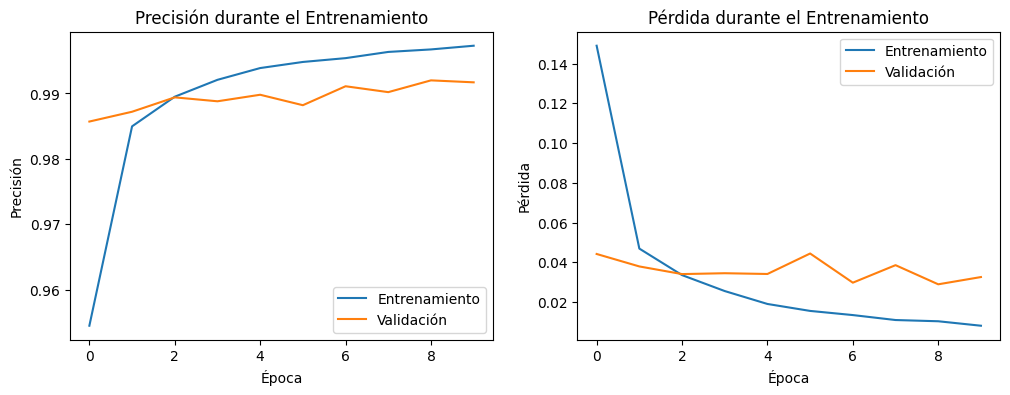

In [9]:
# 8. Visualización del Rendimiento del Modelo
# Graficar precisión y pérdida durante el entrenamiento
plt.figure(figsize=(12, 4))

# Precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

# Pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

plt.show()


In [12]:
# 9. Guardado y Carga del Modelo
# Guardar el modelo completo en un archivo H5
model.save('modelo_cnn_mnist.h5')
print("Modelo guardado como 'modelo_cnn_mnist.h5'")

# Cargar el modelo guardado
nuevo_modelo = tf.keras.models.load_model('modelo_cnn_mnist.h5')
print("Modelo cargado exitosamente.")


Modelo guardado como 'modelo_cnn_mnist.h5'
Modelo cargado exitosamente.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


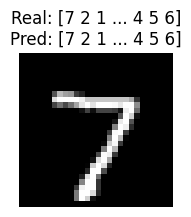

In [15]:
# 10. Hacer Predicciones con el Modelo Cargado
# Hacer predicciones sobre el conjunto de prueba
predicciones = nuevo_modelo.predict(X_test)

# Mostrar predicción para la primera imagen del conjunto de prueba
indice = 0

# Función para mostrar la imagen con la predicción
def mostrar_prediccion(matriz, etiqueta_real, prediccion, indice):
    plt.figure(figsize=(2,2))
    plt.imshow(matriz[indice].reshape(28, 28), cmap='gray')
    plt.title(f"Real: {etiqueta_real}\nPred: {prediccion}")
    plt.axis('off')
    plt.show()

# Mostrar la primera imagen del conjunto de prueba con su predicción
mostrar_prediccion(X_test, y_test, np.argmax(predicciones, axis=1), indice)
